In [16]:
# Import packages
import ee
import geemap
import geopandas as gpd
import pandas as pd
import rasterio
import rasterstats
import matplotlib.pyplot as plt

In [2]:
# Import this file to derive the polygon geometry for all districts in Telangana
districts_Telangana = gpd.read_file('C:/Users/mieke/Documents/Msc Thesis/GitHub repositories/dicra/src/api/boundaries/TS_district_boundary.json')
districts_Telangana

,Area,Dist_Name,uid,geometry
0,6974.142517,Bhadradri Kothagudem,TDID1,"POLYGON ((80.91930 17.21950, 80.93816 17.21971..."
1,2853.088839,Jagtial,TDID2,"POLYGON ((79.29767 18.81833, 79.27566 18.82538..."
2,2112.708002,Jangoan,TDID3,"POLYGON ((79.23083 17.99250, 79.19182 17.99887..."
3,4189.022904,Mulugu,TDID4,"POLYGON ((79.84389 18.15964, 79.85469 18.14713..."
4,3701.834985,Kamareddy,TDID5,"POLYGON ((78.52433 18.46778, 78.51680 18.46579..."
5,2127.790076,Karimnagar,TDID6,"POLYGON ((79.12410 18.66557, 79.11729 18.66475..."
6,4491.247740,Khammam,TDID7,"POLYGON ((80.91930 17.21950, 80.89326 17.22221..."
7,3551.035197,Mahabubabad,TDID8,"POLYGON ((79.56249 17.61965, 79.56047 17.60609..."
8,3909.400107,Mancherial,TDID9,"POLYGON ((79.93091 19.15612, 79.92258 19.16502..."
9,2771.683489,Medak,TDID10,"POLYGON ((78.56878 18.18295, 78.56602 18.17606..."


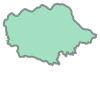

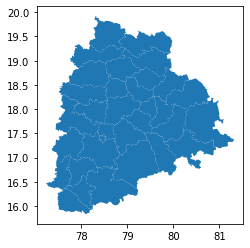

In [3]:
districts_Telangana.plot() # Plot the districts
districts_Telangana.loc[1][3] # Plots the geometry (3) of Jagtial (1)

In [4]:
# Import the crop yields per districts
yield_maize = pd.read_excel('C:/Users/mieke/Documents/Msc Thesis/Datasets/Maize_yield_district.xlsx')

In order to start with a very basiscmodel, we only add the parameter for NDVI (2016-2022). The higher the NDVI, the healthier the vegetation. Hence, the higher the crop yield. Therefore, we expect a positive relation between NDVI and crop yield.

# NDVI
Note: Soil moiture date is only from Januaryy till May, while Maize is mainly grown in Kharif (July - October)

In [6]:
# Read the NDVI raster
NDVI_file1 = "C:/Users/mieke/Documents/Msc Thesis/Datasets/DiCRA/NDVI/NDVI_2022/RASTER/08-05-2022.tif"
NDVI = rasterio.open(NDVI_file1, mode = 'r')

In [8]:
# Assign raster values to a numpy nd array
NDVI_array = NDVI.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = NDVI.transform
NDVI.meta
# Geographical coordinate reference system is used (4326)
#NDVI.nodata # value which has been assigned for the nodata

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1815,
 'height': 1816,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0022457882102987986, 0.0, 77.23939391680676,
        0.0, -0.0022457882102988034, 19.915649848929792)}

In [12]:
# Calculating the zonal statistics on district level
# NOTE: stats must be any of these ['count', 'min', 'max', 'mean', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range', 'nodata', 'nan']
mean_NDVI = rasterstats.zonal_stats(districts_Telangana, NDVI_array, affine = affine, stats = ['mean'], geojson_out = True, nodata = NDVI.nodata)
# Extracting the landuse statistics from the list
avg_NDVI = []
i = 0
while i < len(mean_NDVI):
    avg_NDVI.append(mean_NDVI[i]['properties'])
    i = i + 1

In [13]:
# Extracting the NDVI statistics from the list (district level)
NDVI_stats = []
i = 0
while i < len(avg_NDVI):
    NDVI_stats.append(avg_NDVI[i]['mean'])
    i = i + 1

Text(81.67146265930535, 0.5, 'latitude')

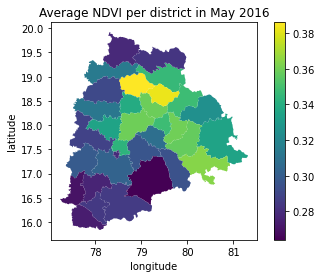

In [18]:
# Plot the average NDVI per district
districts_Telangana['Mean'] = NDVI_stats
districts_Telangana.plot(column = 'Mean', legend = True)
plt.title('Average NDVI per district in May 2016')
plt.xlabel('longitude')
plt.ylabel('latitude')